<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-настройка-среды" data-toc-modified-id="Импорт-библиотек-и-настройка-среды-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек и настройка среды</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Набор данных находится в файле `/datasets/insurance.csv`.  
Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.  
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Импорт библиотек и настройка среды

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Загрузка данных

Shape: (5000, 5)
Количество пропусков 0
Количество дубликатов 153


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


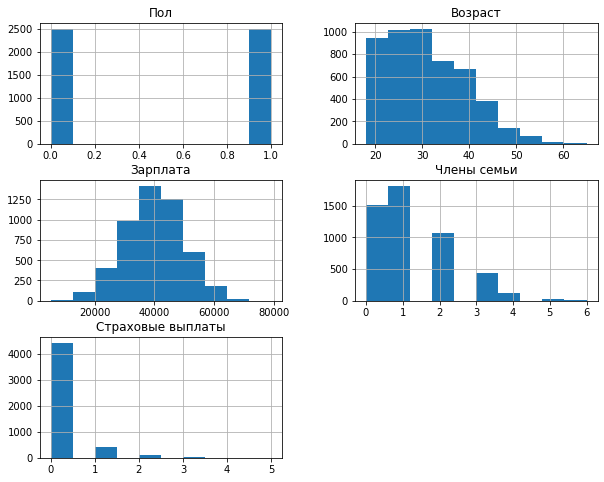

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

print('Shape:', data.shape)
print('Количество пропусков', data.isna().sum().sum())
print('Количество дубликатов', data.duplicated().sum())
display(data.head())
display(data.describe())
data.hist(figsize=(10, 8));

В данных есть дубликаты. Возможно, это просто клиенты с одинаковыми признаками. Оставим их.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**   
Качество не изменится.

**Обоснование:**

Используемые свойства:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$
Доказательство:
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w' = a'
$$
\
$$
w = (X^T X)^{-1} X^T y
$$
\
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$

$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} X^T y
$$

А так как $ w = (X^T X)^{-1} X^T y $, следовательно:
$$
w' = P^{-1} w
$$  

Таким образом мы имеем: $a = Xw$, и $a' = (XP)w'$  

Теперь подставим $w'$ в наше уравнение: $a' = XPP^{-1}w = Xw = a$

Мы видим, что новый вектор весов в будет равен старому вектору весов умноженному на обратную матрицу от той, на которую мы умножили матрицу признаков.  
Таким образом, мы смогли показать, как связаны параметры линейной регрессиии в задаче с исходными признаками, и с преобразованными.

## Алгоритм преобразования

Для защиты данных пользователей будем умножать матрицу с данными пользователей на обратимую матрицу.

**Алгоритм**

$X secured = X * MATRIXinvertible$

In [9]:
def secure_data(X):
    # Создадим обратимую матрицу размера 4 х 4
    rand_state = np.random.RandomState(seed=1)
    inv_matrix = rand_state.normal(size=(X.shape[1], X.shape[1]))
    # Проверим матрицу на обратимость
    if np.linalg.det(inv_matrix) != 0:
        # Умножим первоначальную матрицу с признаками "X" на обратимую матрицу "inv_matrix" и сохраним рещультат в "X_new"
        X_new = X @ inv_matrix
        return X_new
    else:
        return print('Function error: matrix is not invertible. Please fix the function')

**Обоснование**  

Можно сказать, что обратимая матрица - это константа $P$. Исходная функция прямой, которая аппроксимирует зависимость признаков от целевой переменной, у нас выглядит следующим образом: $a = Xw$  
При умножении матрицы $X$ на константу (в нашем случае матрицу $P$) - мы изменяем угол наклона прямой. Чтобы вернуть угол прямой в исходной положение, при обучении корректируется вектор весов, как бы отклоняя прямую в обратную сторону.  
Поэтому, при умножении матрицы признаков $X$ на константную обратимую матрицу $P$ - качество нашей модели не меняется. 

Докажем, что $ MSE(Xw_1, y) = MSE(XPw_2, y) $
$$
Xw_1 = XPw_2
$$
$$
X(X^TX)^{-1}X^Ty = XP((XP)^TXP)^{-1}(XP)^Ty
$$
$$
X(X^TX)^{-1}X^Ty = XP(P^T (X^TX) P)^{-1} P^T X^T y
$$
$$
X(X^TX)^{-1}X^Ty = X P P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
$$
X(X^TX)^{-1}X^T y = X (X^T X)^{-1} X^T y
$$
$$
Xw_1 = Xw_1
$$

Таким образом, мы доказали, что ответы модели, а значит и средняя квадратичная ошибка, действительно равны в обоих случаях.

## Проверка алгоритма

In [5]:
# Разделим данные на признаки и таргет.
X, y = data.drop('Страховые выплаты', axis=1), data['Страховые выплаты']

In [5]:
# Создадим функцию, которая будет оценивать параметр r2 и выводить кожффициенты модели на экран.
def calculate_r2(X):
    lin_reg = LinearRegression()
    score = cross_val_score(lin_reg, X, y, scoring='r2').mean()
    lin_reg.fit(X, y)
    print('R2_score', score)
    print(f'''    Коэффициенты: {lin_reg.coef_}, 
    Сдвиг: {lin_reg.intercept_}''')

In [9]:
# Посчитаем R2 на первоначальных данных
print('Линейная регрессия с исходными признаками')
calculate_r2(X)

Линейная регрессия с исходными признаками
R2_score 0.4231137691590773
    Коэффициенты: [ 7.92580543e-03  3.57083050e-02 -1.70080492e-07 -1.35676623e-02], 
    Сдвиг: -0.9382355041527256


Теперь умножим признаки на обратимую матрицу и проверим, изменится ли качество линейной регрессии.

In [7]:
X_secured = secure_data(X)
print('Shape of X:', X_secured.shape)
print('Shape of X_new:', X_secured.shape)

Shape of X: (5000, 4)
Shape of X_new: (5000, 4)


In [10]:
# Посчитаем R2 для признаков, которые были умножены на обратимую матрицу.
print('Линейная регрессия с преобразованными признаками')
calculate_r2(X_secured)

Линейная регрессия с преобразованными признаками
R2_score 0.42311376915911847
    Коэффициенты: [0.04432657 0.01894927 0.03689241 0.03075391], 
    Сдвиг: -0.9382355041363116


**Резюме**  
Качество модели практически не изменилось (изменение есть лишь на 13-м знаке после запятой).